<a href="https://colab.research.google.com/github/guimaraesjeh/python_regressao/blob/main/python_analise_regressao_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise em um dataset de campanha de marketing
Uma empresa está investindo mensalmente em plataformas de publicidade online, como Youtube, Facebook e newspaper, para a prospecção de leads (pessoas interessadas em seus produtos). A fim de acompanhar o desempenho desses investimentos, a empresa registra todos os gastos com publicidade e todos os retornos de vendas gerados a partir desses investimentos. Para entender melhor a relação entre as variáveis presentes nesses registros e identificar os fatores que mais impactam na geração de leads, a empresa solicitou a análise de um especialista em dados. Além disso, a empresa busca criar um modelo de predição de valores para estimar o retorno de vendas que pode ser gerado a partir de um determinado investimento em publicidade.

# Importação de bibliotecas necessárias para análise dos dados

In [ ]:
# Importação das lib's necessárias para o desafio
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

# Acesso ao Dataset

In [ ]:
# Acesso aos dados do Dataset
df = pd.read_csv('MKT.csv')
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
#Verificando linhas finais do dataset
df.tail()

,youtube,facebook,newspaper,sales
166,45.84,4.44,16.56,9.12
167,113.04,5.88,9.72,11.64
168,212.40,11.16,7.68,15.36
169,340.32,50.40,79.44,30.60
170,278.52,10.32,10.44,16.08


# Análise Descritiva


*   Youtube: apresenta média de investimentos de 178.02 e um elevado desvio padrão de 102.44, isto revela que entre os valores de investimentos nas categorias, esta categoria apresenta variações muito altas.
*   Facebook: apresenta média de investimentos de 27.67 e desvio padrão de 17.91, apresenta variações médias.
*   Newspaper: apresenta média de investimentos de 35.24 e desvio padrão de 35.24, apresenta variações altas.
*   Sales: apresenta média de vendas de 16.92 e desvio padrão de 6.31, apresenta variações baixas.




In [ ]:
# Análise Descritiva
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [ ]:
#Verificando nulos
df.isnull().sum()

,0
youtube,0
facebook,0
newspaper,0
sales,0


In [ ]:
# Análise Descritiva, entradas de 171 dados e dados do tipo float estão corretos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


# Análise Exploratória

In [ ]:
# Correlação é uma medida estatística que representa a força de uma relação linear entre duas variáveis, quanto mais próximo do 1, mais forte é a correlação
# Logo a melhor correlação entre youtube x facebook e newspaper com as vendas é a do youtube com 0,78
df.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


In [ ]:
# Verificando valores de investimentos x valores de vendas
valores = pd.DataFrame({'Categoria': df.columns, 'Total': df.sum()})
valores

,Categoria,Total
youtube,youtube,30441.60
facebook,facebook,4731.84
newspaper,newspaper,6026.04
sales,sales,2893.80


In [ ]:
px.bar(valores, x='Categoria', y='Total',  color='Categoria', color_discrete_sequence=['blue', 'green', 'orange', 'red'])
# Facebook demonstra maiores valores de investimentos dentre as categorias

In [ ]:
df.columns

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

<Axes: >

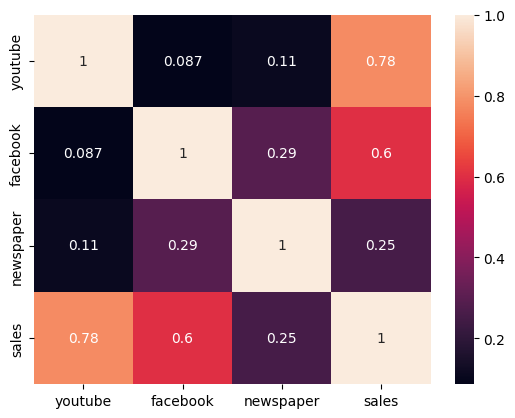

In [ ]:
sns.heatmap(df.corr(), annot=True)
#A função `.corr()` e o heatmap destacam as correlações entre vendas e plataformas.
# Os dados confirmam que o YouTube tem a relação mais forte (0.78), seguido pelo Facebook (0.6) e, por último, o jornal impresso (0.25).

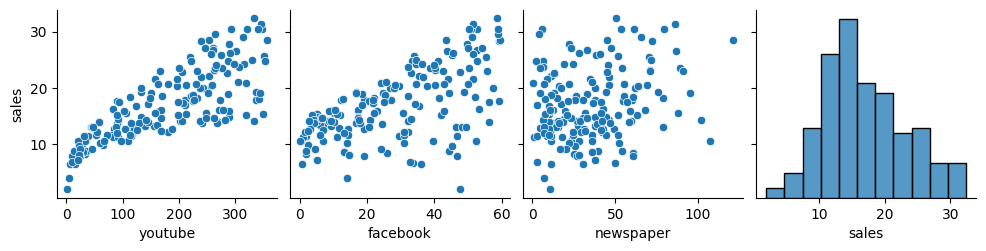

In [ ]:
sns.pairplot(df, x_vars=['youtube', 'facebook', 'newspaper', 'sales'], y_vars='sales');
# O primeiro gráfico mostra que os investimentos no YouTube resultam, na maioria dos casos, em aumento proporcional das vendas,
# tornando-se a opção mais consistente, embora não necessariamente a de maior retorno. No segundo gráfico, observa-se que o Facebook
# apresenta um impacto menos previsível, mas pode gerar picos de vendas com investimentos altos. Já o jornal impresso demonstra grande
# incerteza, frequentemente sem retorno significativo. Assim, conclui-se que o YouTube teve o maior impacto nas vendas. A seguir, será
# realizada a análise das correlações para uma avaliação mais detalhada.

<Axes: xlabel='sales', ylabel='Count'>

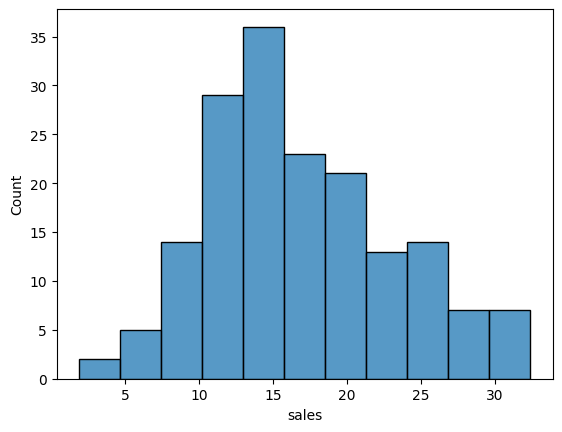

In [ ]:
sns.histplot(df['sales'])
# O histograma indica que a maioria das vendas se concentra entre 10 e 20 unidades, com um pico próximo de 15.
# A distribuição sugere uma leve assimetria à direita, indicando que vendas mais altas são menos frequentes.

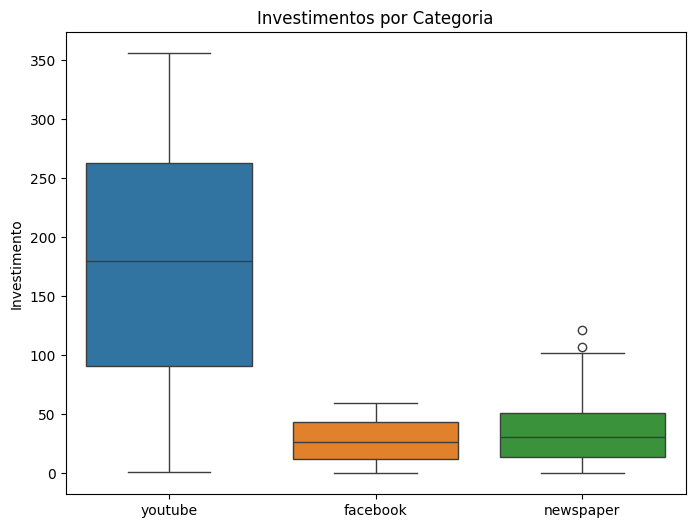

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['youtube', 'facebook', 'newspaper']])
plt.title("Investimentos por Categoria")
plt.ylabel("Investimento")
plt.show()
# O boxplot mostra a distribuição dos investimentos em três categorias: YouTube, Facebook e Newspaper. O YouTube apresenta os maiores investimentos,
# com maior dispersão e alguns valores elevados. O **Facebook** tem menor variação, com valores mais concentrados e sem grandes outliers. O Newspaper
# mostra uma distribuição mais dispersa, com alguns outliers indicando investimentos esporádicos mais altos. Isso sugere que o YouTube recebe os maiores
# e mais variados investimentos, enquanto Facebook e Newspaper têm menor amplitude de investimento.

# Separação de dados para os modelos de predição

In [ ]:
# Separação de dados

x = df[['youtube',	'facebook',	'newspaper'	]]

y = df[['sales']]

In [ ]:
# Criar as bases de treino e as bases de testes
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(119, 3)
(52, 3)
(119, 1)
(52, 1)


# MODELING TECHNIQUES
1. **Linear Regression** from SKLEARN
<https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LinearRegression.html>
2. **Support Vector Regression** from SKLEARN
<https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVR.html>
3. **Decision Tree Regression** from XGBoost
<https://xgboost.readthedocs.io/en/stable/treemethod.html>

# MODELING ASSUMPTIONS
Apenas variáveis numéricas


# REGRESSÃO LINEAR

In [ ]:
# Linear Regression, aplicando método fit para informar X e Y
regLinear = LinearRegression().fit(X_train, y_train)

In [ ]:
# Usando o método predict para predizer o modelo, preço das casas p/ massa X de teste
yLinear = regLinear.predict(X_test)

In [ ]:
# Verificando o modelo com MSE, na predição foi usado o X_test logo o correlacionado
# é o y_test, e o ypredito é o ylinear
# COMPARANDO O REAL COM PREDITO
MSELinear = mean_squared_error(y_test, yLinear)
print('MSE Linear:', MSELinear)
# P/ verificar RMSE, usar a função np.sqrt(MSE) que é a função de raiz quadrada
print('RMSE Linear:', np.sqrt(MSELinear))
#Verificando r²
r = r2_score(y_test, yLinear)
print('Este é o r² do modelo', r)
# O coeficiente de determinação (R²) de 0,8824 indica que 88,24% da variação nas vendas é explicada pelo modelo preditivo desenvolvido com os dados disponíveis.

MSE Linear: 4.699445585122349
RMSE Linear: 2.167820468840155
Este é o r² do modelo 0.882423505618885


# SVR

In [ ]:
# SVR Regression, aplicando método fit para informar X e Y
regSVR = SVR().fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
# Usando o método predict para predizer o modelo, preço das casas p/ massa X de teste
ySVR = regSVR.predict(X_test)

In [ ]:
# Verificando o modelo com MSE, na predição foi usado o X_test logo o correlacionado
# é o y_test, e o ypredito é o ylinear
# COMPARANDO O REAL COM PREDITO
MSESVR = mean_squared_error(y_test, ySVR)
print('MSE SVR: ', MSESVR)
# P/ verificar RMSE, usar a função np.sqrt(MSE) que é a função de raiz quadrada
print('RMSE SVR:', np.sqrt(MSESVR))
#Verificando r²
r = r2_score(y_test, ySVR)
print('Este é o r² do modelo', r)
# # O coeficiente de determinação (R²) de 0,7672 indica que 76,72% da variação nas vendas é explicada pelo modelo preditivo desenvolvido com os dados disponíveis.

MSE SVR:  9.304486700664437
RMSE SVR: 3.0503256712463402
Este é o r² do modelo 0.7672089380621374


# DECISION TREE REGRESSION (XGboost)

In [ ]:
# Decision Tree Regression, aplicando método fit para informar X e Y
regXGB = XGBRegressor().fit(X_train, y_train)

In [ ]:
# Usando o método predict para predizer o modelo, preço das casas p/ massa X de teste
yXGB = regXGB.predict(X_test)

In [ ]:
MSEXGB = mean_squared_error(y_test, yXGB)
print('MSE XGB: ', MSEXGB)
print('RMSE XGB:', np.sqrt(MSEXGB))
#Verificando r²
r = r2_score(y_test, yXGB)
print('Este é o r² do modelo', r)
# O coeficiente de determinação (R²) de 0,9591 indica que 95,91% da variação nas vendas é explicada pelo modelo preditivo desenvolvido com os dados disponíveis.
# EM COMPARAÇÃO A REGRESSÃO LINEAR E SRV A DECISION TREE ESTÁ MELHOR EM QUESITOS ERROS

MSE XGB:  1.6327102184295654
RMSE XGB: 1.277775496098421
Este é o r² do modelo 0.9591508507728577


# Modelo escolhido : DECISION TREE REGRESSION (XGboost)
Devido aos melhores índices de MSE, RMSE e r²

#  Calculando predição

Text(0.5, 0, 'index')

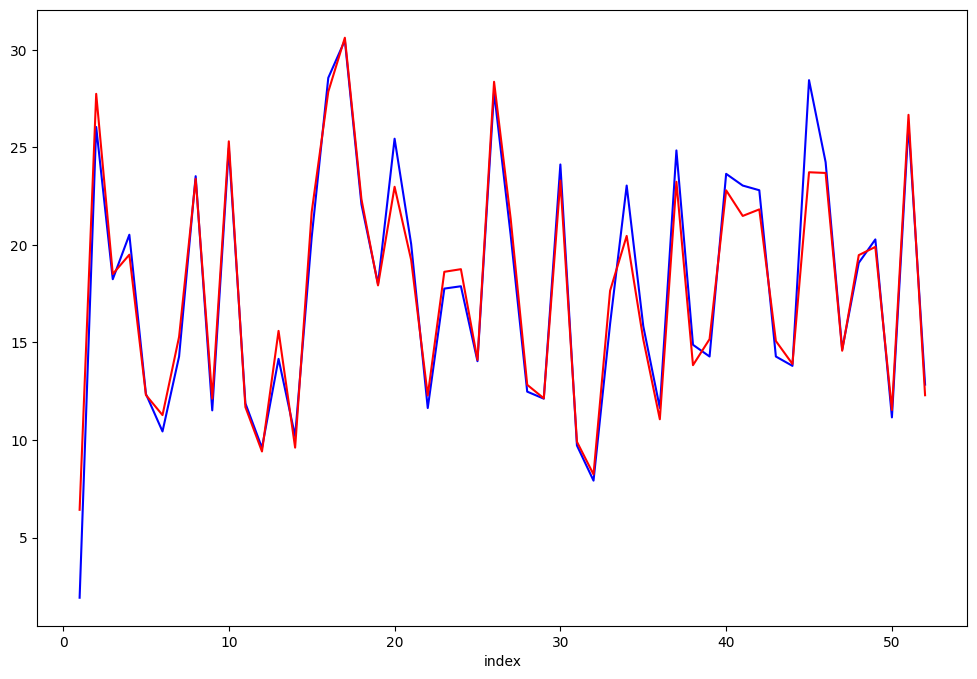

In [ ]:
c = [i for i in range(1, 53, 1)]

fig = plt.figure(figsize=(12,8))
plt.plot(c, y_test, color='blue')
plt.plot(c, yXGB, color='red')
plt.xlabel('index')

In [ ]:
youtube = 50
facebook = 50
newspaper = 50
entry = [[youtube, facebook, newspaper]]
regXGB.predict(entry)[0]

13.001387

In [ ]:
youtube = 200
facebook = 50
newspaper = 50
entry = [[youtube, facebook, newspaper]]
regXGB.predict(entry)[0]

21.787962

In [ ]:
youtube = 50
facebook = 200
newspaper = 50
entry = [[youtube, facebook, newspaper]]
regXGB.predict(entry)[0]

13.542953

In [ ]:
youtube = 50
facebook = 50
newspaper = 200
entry = [[youtube, facebook, newspaper]]
regXGB.predict(entry)[0]

13.016685

# RESULTADO

Os resultados mostram previsões de vendas com diferentes níveis de investimento em YouTube, Facebook e Newspaper.

- Aumentar o investimento no YouTube de 50 para 200 (mantendo os outros fixos) aumenta a previsão de vendas de 13,00 para 21,78, indicando um impacto positivo significativo.
- Aumentar o Facebook para 200 tem um impacto menor, elevando as vendas para 13,54.
- Um investimento extremo em Newspaper (200) praticamente não altera a previsão, mantendo-a em 13,01, mostrando que essa plataforma tem pouca influência nas vendas.
Conclusão: YouTube é a plataforma com maior impacto nas vendas, enquanto Facebook tem efeito menor e Newspaper quase nenhum.